# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████| 60.0k/60.0k [00:25<00:00, 2.32kFile/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

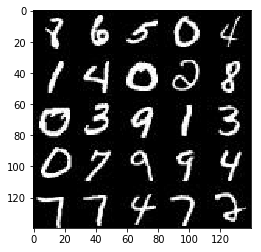

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

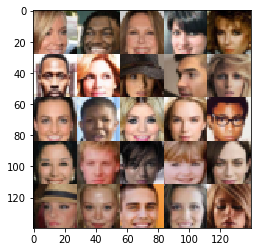

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow Version: 1.5.0


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    real_inputs = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels),
                                'real_inputs')
    z_inputs = tf.placeholder(tf.float32, (None, z_dim), 'z_inputs')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return real_inputs, z_inputs, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    alpha = 0.1
    keep_prob = 0.9

    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', activation=None)
        x1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d(x1, 128, 5, strides=2, padding='same', activation=None)
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2, keep_prob=keep_prob)
        
        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same', activation=None)
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.dropout(x3, keep_prob=keep_prob)
        
        flat = tf.reshape(x3, (-1,  4 * 4 * 256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha = 0.2
    
    with tf.variable_scope('generator', reuse=not is_train):
        
        h1 = tf.layers.dense(z, 2*2*512)
        h1 = tf.reshape(h1, (-1, 2, 2, 512))
        h1 = tf.layers.batch_normalization(h1, training=is_train)
        h1 = tf.maximum(alpha * h1, h1)
    
        h2 = tf.layers.conv2d_transpose(h1, 256, 5, 2, 'valid')
        h2 = tf.layers.batch_normalization(h2, training=is_train)
        h2 = tf.maximum(alpha * h2, h2)
    
        h3 = tf.layers.conv2d_transpose(h2, 128, 5, 2, 'same')
        h3 = tf.layers.batch_normalization(h3, training=is_train)
        h3 = tf.maximum(alpha * h3, h3)
    
        logits = tf.layers.conv2d_transpose(h3, out_channel_dim, 5, 2, 'same')
        out = tf.tanh(logits)
    
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                                         labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                                         labels=tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                                    labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    d_train_opt = tf.train.AdamOptimizer(
        learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    
    ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_updates = [opt for opt in ops if opt.name.startswith('generator')]
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(
            learning_rate, beta1).minimize(g_loss, var_list=g_vars)
        
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, img_width, img_height, img_channels = data_shape
    
    real_input, z_input, lr = model_inputs(
        img_width, img_height, img_channels, z_dim)
    
    d_loss, g_loss = model_loss(real_input, z_input, img_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    print_every = 10
    show_every = 100
    losses = []
    n_images = 25
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2.0
                z_sample = np.random.uniform(-1, 1, (batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={
                        real_input: batch_images, z_input: z_sample, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={
                        z_input: z_sample, lr: learning_rate})
                
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({z_input: z_sample, real_input: batch_images})
                    train_loss_g = g_loss.eval({z_input: z_sample})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))
                
                if steps % show_every == 0:
                    show_generator_output(sess, n_images, z_input, img_channels, data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 3.1313... Generator Loss: 0.0615
Epoch 1/2... Discriminator Loss: 1.7039... Generator Loss: 9.1925
Epoch 1/2... Discriminator Loss: 0.9739... Generator Loss: 1.8650
Epoch 1/2... Discriminator Loss: 0.9442... Generator Loss: 3.4259
Epoch 1/2... Discriminator Loss: 0.4787... Generator Loss: 2.2244
Epoch 1/2... Discriminator Loss: 0.6438... Generator Loss: 1.0218
Epoch 1/2... Discriminator Loss: 0.3492... Generator Loss: 3.1403
Epoch 1/2... Discriminator Loss: 0.3574... Generator Loss: 1.9001
Epoch 1/2... Discriminator Loss: 0.3854... Generator Loss: 2.0609
Epoch 1/2... Discriminator Loss: 0.5019... Generator Loss: 1.6134


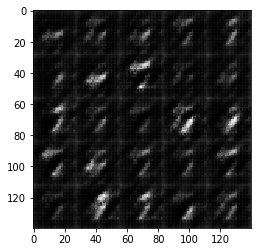

Epoch 1/2... Discriminator Loss: 0.8989... Generator Loss: 1.2390
Epoch 1/2... Discriminator Loss: 2.1303... Generator Loss: 0.3500
Epoch 1/2... Discriminator Loss: 0.7984... Generator Loss: 1.1252
Epoch 1/2... Discriminator Loss: 0.7594... Generator Loss: 1.9091
Epoch 1/2... Discriminator Loss: 1.5785... Generator Loss: 4.5855
Epoch 1/2... Discriminator Loss: 0.8611... Generator Loss: 1.0973
Epoch 1/2... Discriminator Loss: 1.4465... Generator Loss: 3.2293
Epoch 1/2... Discriminator Loss: 1.0966... Generator Loss: 2.3426
Epoch 1/2... Discriminator Loss: 0.8739... Generator Loss: 2.7131
Epoch 1/2... Discriminator Loss: 1.3582... Generator Loss: 1.7278


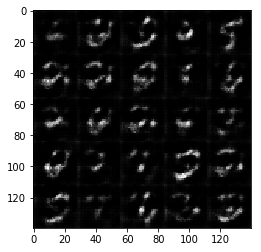

Epoch 1/2... Discriminator Loss: 1.1772... Generator Loss: 0.9223
Epoch 1/2... Discriminator Loss: 1.0786... Generator Loss: 2.7002
Epoch 1/2... Discriminator Loss: 1.2589... Generator Loss: 2.0926
Epoch 1/2... Discriminator Loss: 1.0266... Generator Loss: 1.6077
Epoch 1/2... Discriminator Loss: 0.9926... Generator Loss: 1.4594
Epoch 1/2... Discriminator Loss: 1.0435... Generator Loss: 1.2239
Epoch 1/2... Discriminator Loss: 1.0750... Generator Loss: 1.0299
Epoch 1/2... Discriminator Loss: 1.3264... Generator Loss: 1.9392
Epoch 1/2... Discriminator Loss: 1.5509... Generator Loss: 0.4453
Epoch 1/2... Discriminator Loss: 1.1421... Generator Loss: 0.6314


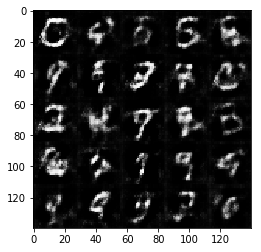

Epoch 1/2... Discriminator Loss: 1.3607... Generator Loss: 0.5048
Epoch 1/2... Discriminator Loss: 1.3844... Generator Loss: 0.4661
Epoch 1/2... Discriminator Loss: 1.3599... Generator Loss: 0.4496
Epoch 1/2... Discriminator Loss: 1.5953... Generator Loss: 0.3693
Epoch 1/2... Discriminator Loss: 1.1904... Generator Loss: 0.5993
Epoch 1/2... Discriminator Loss: 1.6244... Generator Loss: 0.2923
Epoch 1/2... Discriminator Loss: 1.1661... Generator Loss: 0.5920
Epoch 1/2... Discriminator Loss: 1.1486... Generator Loss: 0.5631
Epoch 1/2... Discriminator Loss: 1.2943... Generator Loss: 0.5589
Epoch 1/2... Discriminator Loss: 1.5262... Generator Loss: 0.3834


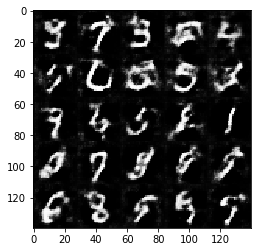

Epoch 1/2... Discriminator Loss: 1.0437... Generator Loss: 0.8330
Epoch 1/2... Discriminator Loss: 1.3267... Generator Loss: 1.6783
Epoch 1/2... Discriminator Loss: 1.0311... Generator Loss: 1.0061
Epoch 1/2... Discriminator Loss: 1.3090... Generator Loss: 2.1559
Epoch 1/2... Discriminator Loss: 1.0057... Generator Loss: 1.3455
Epoch 1/2... Discriminator Loss: 1.0487... Generator Loss: 0.8980
Epoch 1/2... Discriminator Loss: 1.2007... Generator Loss: 1.1282
Epoch 1/2... Discriminator Loss: 1.1852... Generator Loss: 1.5814
Epoch 1/2... Discriminator Loss: 1.0954... Generator Loss: 0.7987
Epoch 1/2... Discriminator Loss: 1.4000... Generator Loss: 0.4308


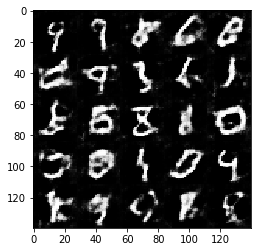

Epoch 1/2... Discriminator Loss: 1.4092... Generator Loss: 0.3939
Epoch 1/2... Discriminator Loss: 1.3347... Generator Loss: 0.4523
Epoch 1/2... Discriminator Loss: 1.5789... Generator Loss: 0.3364
Epoch 1/2... Discriminator Loss: 1.1250... Generator Loss: 0.5328
Epoch 1/2... Discriminator Loss: 1.1131... Generator Loss: 0.6408
Epoch 1/2... Discriminator Loss: 1.3982... Generator Loss: 1.6844
Epoch 1/2... Discriminator Loss: 0.9794... Generator Loss: 0.9380
Epoch 1/2... Discriminator Loss: 1.6539... Generator Loss: 0.2854
Epoch 1/2... Discriminator Loss: 1.3196... Generator Loss: 0.4859
Epoch 1/2... Discriminator Loss: 1.3116... Generator Loss: 0.5284


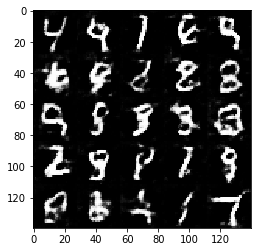

Epoch 1/2... Discriminator Loss: 1.2684... Generator Loss: 1.7592
Epoch 1/2... Discriminator Loss: 1.1691... Generator Loss: 0.8053
Epoch 1/2... Discriminator Loss: 1.3428... Generator Loss: 0.4562
Epoch 1/2... Discriminator Loss: 1.3351... Generator Loss: 0.4509
Epoch 1/2... Discriminator Loss: 1.5319... Generator Loss: 0.3268
Epoch 1/2... Discriminator Loss: 1.1978... Generator Loss: 0.6534
Epoch 1/2... Discriminator Loss: 1.3390... Generator Loss: 0.4768
Epoch 1/2... Discriminator Loss: 1.0166... Generator Loss: 0.8552
Epoch 1/2... Discriminator Loss: 1.1397... Generator Loss: 0.9465
Epoch 1/2... Discriminator Loss: 1.0612... Generator Loss: 0.7789


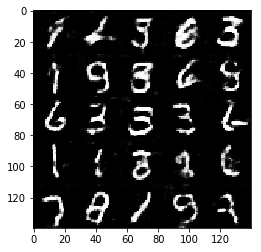

Epoch 1/2... Discriminator Loss: 1.3498... Generator Loss: 0.4623
Epoch 1/2... Discriminator Loss: 1.2250... Generator Loss: 0.5097
Epoch 1/2... Discriminator Loss: 0.8903... Generator Loss: 1.5583
Epoch 1/2... Discriminator Loss: 1.0300... Generator Loss: 1.1091
Epoch 1/2... Discriminator Loss: 1.4869... Generator Loss: 2.2113
Epoch 1/2... Discriminator Loss: 0.9893... Generator Loss: 0.7573
Epoch 1/2... Discriminator Loss: 0.9670... Generator Loss: 1.2230
Epoch 1/2... Discriminator Loss: 1.1333... Generator Loss: 1.8501
Epoch 1/2... Discriminator Loss: 1.0497... Generator Loss: 1.4157
Epoch 1/2... Discriminator Loss: 1.0433... Generator Loss: 0.8424


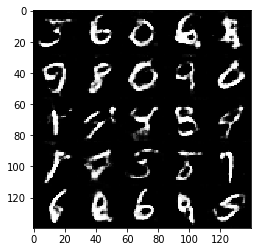

Epoch 1/2... Discriminator Loss: 1.0092... Generator Loss: 0.8472
Epoch 1/2... Discriminator Loss: 1.4198... Generator Loss: 0.3996
Epoch 1/2... Discriminator Loss: 1.1702... Generator Loss: 0.5587
Epoch 1/2... Discriminator Loss: 1.2725... Generator Loss: 0.4689
Epoch 1/2... Discriminator Loss: 0.9733... Generator Loss: 0.8708
Epoch 1/2... Discriminator Loss: 0.9306... Generator Loss: 0.9044
Epoch 1/2... Discriminator Loss: 1.1657... Generator Loss: 1.7546
Epoch 1/2... Discriminator Loss: 1.1189... Generator Loss: 0.6855
Epoch 1/2... Discriminator Loss: 1.3404... Generator Loss: 0.3690
Epoch 1/2... Discriminator Loss: 1.1964... Generator Loss: 0.5735


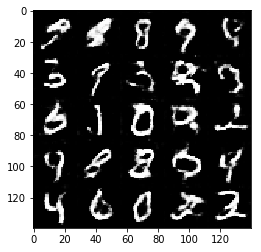

Epoch 1/2... Discriminator Loss: 1.3051... Generator Loss: 0.4596
Epoch 1/2... Discriminator Loss: 0.8498... Generator Loss: 1.1263
Epoch 1/2... Discriminator Loss: 3.0440... Generator Loss: 4.1987
Epoch 2/2... Discriminator Loss: 0.9936... Generator Loss: 1.0840
Epoch 2/2... Discriminator Loss: 1.0131... Generator Loss: 0.6970
Epoch 2/2... Discriminator Loss: 1.0833... Generator Loss: 0.5944
Epoch 2/2... Discriminator Loss: 1.1047... Generator Loss: 0.6753
Epoch 2/2... Discriminator Loss: 0.9175... Generator Loss: 0.8773
Epoch 2/2... Discriminator Loss: 1.0195... Generator Loss: 0.7536
Epoch 2/2... Discriminator Loss: 0.9099... Generator Loss: 1.2617


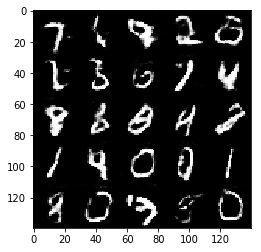

Epoch 2/2... Discriminator Loss: 0.9120... Generator Loss: 1.7059
Epoch 2/2... Discriminator Loss: 1.3195... Generator Loss: 0.4432
Epoch 2/2... Discriminator Loss: 0.8577... Generator Loss: 1.1795
Epoch 2/2... Discriminator Loss: 2.6617... Generator Loss: 0.1080
Epoch 2/2... Discriminator Loss: 0.8425... Generator Loss: 0.8879
Epoch 2/2... Discriminator Loss: 1.4970... Generator Loss: 2.1485
Epoch 2/2... Discriminator Loss: 1.4392... Generator Loss: 0.3442
Epoch 2/2... Discriminator Loss: 1.6484... Generator Loss: 0.2828
Epoch 2/2... Discriminator Loss: 1.2310... Generator Loss: 0.5034
Epoch 2/2... Discriminator Loss: 1.9601... Generator Loss: 0.1805


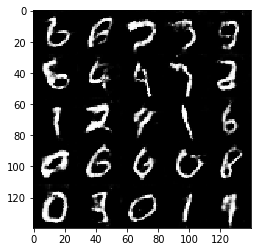

Epoch 2/2... Discriminator Loss: 0.8393... Generator Loss: 1.0061
Epoch 2/2... Discriminator Loss: 1.9391... Generator Loss: 0.2171
Epoch 2/2... Discriminator Loss: 0.7083... Generator Loss: 1.6518
Epoch 2/2... Discriminator Loss: 1.6201... Generator Loss: 0.3376
Epoch 2/2... Discriminator Loss: 1.2579... Generator Loss: 0.5018
Epoch 2/2... Discriminator Loss: 1.0654... Generator Loss: 0.6140
Epoch 2/2... Discriminator Loss: 1.0320... Generator Loss: 0.7016
Epoch 2/2... Discriminator Loss: 1.2720... Generator Loss: 0.5465
Epoch 2/2... Discriminator Loss: 1.1805... Generator Loss: 2.2781
Epoch 2/2... Discriminator Loss: 0.8037... Generator Loss: 1.2526


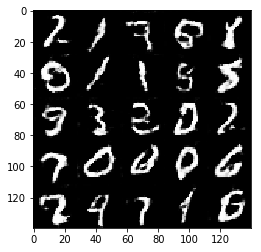

Epoch 2/2... Discriminator Loss: 0.7981... Generator Loss: 1.1326
Epoch 2/2... Discriminator Loss: 0.7457... Generator Loss: 0.9933
Epoch 2/2... Discriminator Loss: 1.3685... Generator Loss: 2.3427
Epoch 2/2... Discriminator Loss: 0.8954... Generator Loss: 1.2079
Epoch 2/2... Discriminator Loss: 0.7066... Generator Loss: 1.0191
Epoch 2/2... Discriminator Loss: 1.9331... Generator Loss: 0.2262
Epoch 2/2... Discriminator Loss: 0.6417... Generator Loss: 1.6502
Epoch 2/2... Discriminator Loss: 1.7259... Generator Loss: 0.3388
Epoch 2/2... Discriminator Loss: 0.8811... Generator Loss: 1.4243
Epoch 2/2... Discriminator Loss: 0.8824... Generator Loss: 1.8169


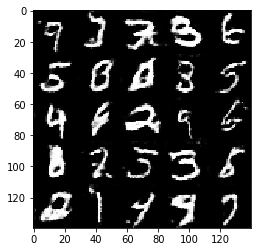

Epoch 2/2... Discriminator Loss: 0.6958... Generator Loss: 1.1634
Epoch 2/2... Discriminator Loss: 1.3936... Generator Loss: 2.4908
Epoch 2/2... Discriminator Loss: 0.8594... Generator Loss: 0.8911
Epoch 2/2... Discriminator Loss: 1.1604... Generator Loss: 0.5841
Epoch 2/2... Discriminator Loss: 1.1911... Generator Loss: 0.5216
Epoch 2/2... Discriminator Loss: 1.1333... Generator Loss: 0.6547
Epoch 2/2... Discriminator Loss: 1.1023... Generator Loss: 0.5653
Epoch 2/2... Discriminator Loss: 2.1074... Generator Loss: 0.1794
Epoch 2/2... Discriminator Loss: 1.3473... Generator Loss: 0.3771
Epoch 2/2... Discriminator Loss: 1.0203... Generator Loss: 0.7481


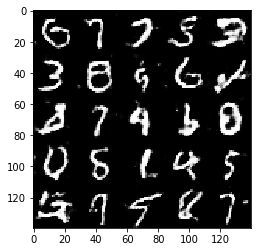

Epoch 2/2... Discriminator Loss: 0.5020... Generator Loss: 1.9233
Epoch 2/2... Discriminator Loss: 0.6078... Generator Loss: 1.6672
Epoch 2/2... Discriminator Loss: 0.6619... Generator Loss: 1.4579
Epoch 2/2... Discriminator Loss: 0.7713... Generator Loss: 1.3374
Epoch 2/2... Discriminator Loss: 1.8794... Generator Loss: 0.2540
Epoch 2/2... Discriminator Loss: 1.1994... Generator Loss: 0.6603
Epoch 2/2... Discriminator Loss: 0.9731... Generator Loss: 0.7483
Epoch 2/2... Discriminator Loss: 0.6840... Generator Loss: 1.2434
Epoch 2/2... Discriminator Loss: 1.4294... Generator Loss: 0.4181
Epoch 2/2... Discriminator Loss: 0.6591... Generator Loss: 1.3115


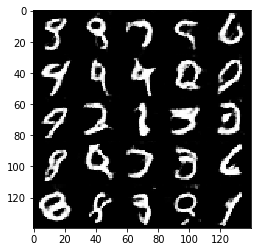

Epoch 2/2... Discriminator Loss: 0.5566... Generator Loss: 1.4888
Epoch 2/2... Discriminator Loss: 0.5053... Generator Loss: 1.5933
Epoch 2/2... Discriminator Loss: 0.8841... Generator Loss: 0.9150
Epoch 2/2... Discriminator Loss: 0.6415... Generator Loss: 2.2711
Epoch 2/2... Discriminator Loss: 0.9021... Generator Loss: 1.6793
Epoch 2/2... Discriminator Loss: 0.4718... Generator Loss: 1.5415
Epoch 2/2... Discriminator Loss: 0.7508... Generator Loss: 1.9448
Epoch 2/2... Discriminator Loss: 0.6623... Generator Loss: 2.5712
Epoch 2/2... Discriminator Loss: 0.5332... Generator Loss: 2.0010
Epoch 2/2... Discriminator Loss: 0.5518... Generator Loss: 1.4718


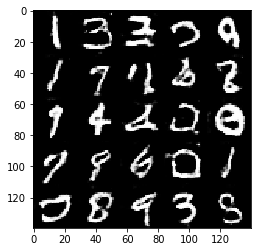

Epoch 2/2... Discriminator Loss: 0.9439... Generator Loss: 0.7455
Epoch 2/2... Discriminator Loss: 0.4995... Generator Loss: 1.5803
Epoch 2/2... Discriminator Loss: 0.4915... Generator Loss: 1.7135
Epoch 2/2... Discriminator Loss: 1.1882... Generator Loss: 2.2947
Epoch 2/2... Discriminator Loss: 1.3015... Generator Loss: 0.4227
Epoch 2/2... Discriminator Loss: 1.6465... Generator Loss: 0.2807
Epoch 2/2... Discriminator Loss: 0.7382... Generator Loss: 1.0052
Epoch 2/2... Discriminator Loss: 0.9757... Generator Loss: 0.7208
Epoch 2/2... Discriminator Loss: 1.6240... Generator Loss: 0.4119
Epoch 2/2... Discriminator Loss: 0.5979... Generator Loss: 1.1427


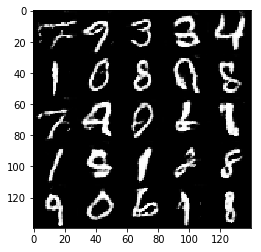

Epoch 2/2... Discriminator Loss: 0.6834... Generator Loss: 2.3735
Epoch 2/2... Discriminator Loss: 0.9998... Generator Loss: 1.9802
Epoch 2/2... Discriminator Loss: 1.2599... Generator Loss: 3.4816
Epoch 2/2... Discriminator Loss: 0.8761... Generator Loss: 1.8157
Epoch 2/2... Discriminator Loss: 0.7838... Generator Loss: 0.8056
Epoch 2/2... Discriminator Loss: 0.6488... Generator Loss: 1.1673
Epoch 2/2... Discriminator Loss: 0.3666... Generator Loss: 1.9088
Epoch 2/2... Discriminator Loss: 0.4383... Generator Loss: 1.7330
Epoch 2/2... Discriminator Loss: 0.8504... Generator Loss: 0.9131
Epoch 2/2... Discriminator Loss: 1.0306... Generator Loss: 0.6966


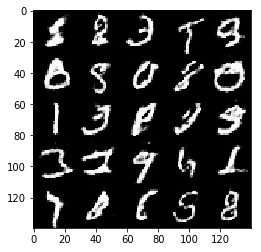

Epoch 2/2... Discriminator Loss: 0.9494... Generator Loss: 0.7175
Epoch 2/2... Discriminator Loss: 1.4756... Generator Loss: 0.4765
Epoch 2/2... Discriminator Loss: 1.4948... Generator Loss: 0.4384
Epoch 2/2... Discriminator Loss: 0.6616... Generator Loss: 1.2962
Epoch 2/2... Discriminator Loss: 0.5648... Generator Loss: 1.3439
Epoch 2/2... Discriminator Loss: 0.6753... Generator Loss: 1.0868
Epoch 2/2... Discriminator Loss: 1.3011... Generator Loss: 0.4950


In [13]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.7718... Generator Loss: 0.2422
Epoch 1/1... Discriminator Loss: 1.5202... Generator Loss: 0.3027
Epoch 1/1... Discriminator Loss: 0.1902... Generator Loss: 5.5364
Epoch 1/1... Discriminator Loss: 2.2233... Generator Loss: 0.1739
Epoch 1/1... Discriminator Loss: 1.3007... Generator Loss: 5.2186
Epoch 1/1... Discriminator Loss: 1.0669... Generator Loss: 0.9362
Epoch 1/1... Discriminator Loss: 1.4701... Generator Loss: 0.4151
Epoch 1/1... Discriminator Loss: 1.7487... Generator Loss: 0.3124
Epoch 1/1... Discriminator Loss: 0.9343... Generator Loss: 0.8486
Epoch 1/1... Discriminator Loss: 2.6071... Generator Loss: 0.1468


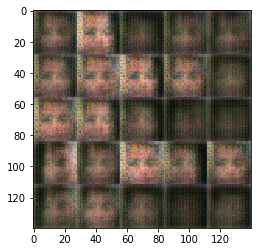

Epoch 1/1... Discriminator Loss: 2.5601... Generator Loss: 0.1211
Epoch 1/1... Discriminator Loss: 1.0397... Generator Loss: 1.5422
Epoch 1/1... Discriminator Loss: 1.7974... Generator Loss: 0.4011
Epoch 1/1... Discriminator Loss: 1.8280... Generator Loss: 0.4285
Epoch 1/1... Discriminator Loss: 1.0069... Generator Loss: 1.5147
Epoch 1/1... Discriminator Loss: 1.6648... Generator Loss: 0.3623
Epoch 1/1... Discriminator Loss: 1.2163... Generator Loss: 1.0471
Epoch 1/1... Discriminator Loss: 1.1655... Generator Loss: 1.5478
Epoch 1/1... Discriminator Loss: 1.1629... Generator Loss: 1.8575
Epoch 1/1... Discriminator Loss: 1.2922... Generator Loss: 0.7150


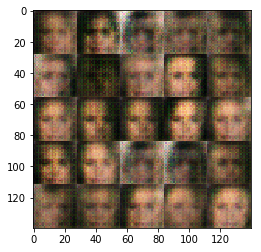

Epoch 1/1... Discriminator Loss: 1.2801... Generator Loss: 0.7725
Epoch 1/1... Discriminator Loss: 1.5326... Generator Loss: 0.3681
Epoch 1/1... Discriminator Loss: 1.3495... Generator Loss: 0.5906
Epoch 1/1... Discriminator Loss: 1.6290... Generator Loss: 1.2815
Epoch 1/1... Discriminator Loss: 1.5708... Generator Loss: 1.8385
Epoch 1/1... Discriminator Loss: 1.4383... Generator Loss: 0.7428
Epoch 1/1... Discriminator Loss: 1.1793... Generator Loss: 0.7134
Epoch 1/1... Discriminator Loss: 1.3314... Generator Loss: 0.9002
Epoch 1/1... Discriminator Loss: 0.9028... Generator Loss: 1.8835
Epoch 1/1... Discriminator Loss: 1.4302... Generator Loss: 1.6159


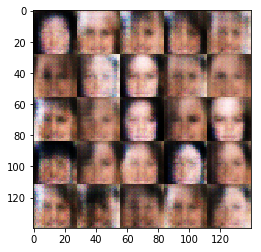

Epoch 1/1... Discriminator Loss: 1.1419... Generator Loss: 0.8733
Epoch 1/1... Discriminator Loss: 1.4319... Generator Loss: 0.4497
Epoch 1/1... Discriminator Loss: 1.0296... Generator Loss: 1.0491
Epoch 1/1... Discriminator Loss: 1.0962... Generator Loss: 0.9062
Epoch 1/1... Discriminator Loss: 1.1133... Generator Loss: 1.2160
Epoch 1/1... Discriminator Loss: 1.3318... Generator Loss: 0.9358
Epoch 1/1... Discriminator Loss: 1.0413... Generator Loss: 0.7583
Epoch 1/1... Discriminator Loss: 1.2049... Generator Loss: 2.3125
Epoch 1/1... Discriminator Loss: 1.1506... Generator Loss: 1.1744
Epoch 1/1... Discriminator Loss: 0.9217... Generator Loss: 1.2216


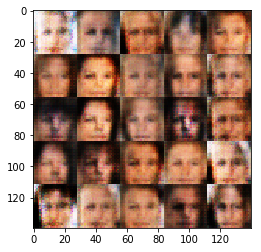

Epoch 1/1... Discriminator Loss: 1.8756... Generator Loss: 3.1928
Epoch 1/1... Discriminator Loss: 1.9026... Generator Loss: 0.3173
Epoch 1/1... Discriminator Loss: 0.9034... Generator Loss: 1.4726
Epoch 1/1... Discriminator Loss: 1.0231... Generator Loss: 0.8479
Epoch 1/1... Discriminator Loss: 0.9612... Generator Loss: 0.8697
Epoch 1/1... Discriminator Loss: 1.4675... Generator Loss: 0.4177
Epoch 1/1... Discriminator Loss: 1.2637... Generator Loss: 1.0678
Epoch 1/1... Discriminator Loss: 2.5377... Generator Loss: 0.1106
Epoch 1/1... Discriminator Loss: 1.0128... Generator Loss: 1.5477
Epoch 1/1... Discriminator Loss: 1.2824... Generator Loss: 0.5763


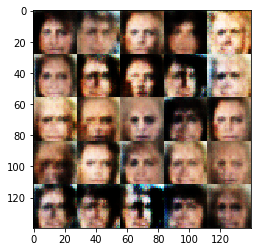

Epoch 1/1... Discriminator Loss: 1.6348... Generator Loss: 0.3765
Epoch 1/1... Discriminator Loss: 1.4504... Generator Loss: 1.7078
Epoch 1/1... Discriminator Loss: 1.8109... Generator Loss: 0.2655
Epoch 1/1... Discriminator Loss: 1.0872... Generator Loss: 0.9204
Epoch 1/1... Discriminator Loss: 1.0371... Generator Loss: 0.8068
Epoch 1/1... Discriminator Loss: 1.0845... Generator Loss: 0.9668
Epoch 1/1... Discriminator Loss: 1.1091... Generator Loss: 0.9643
Epoch 1/1... Discriminator Loss: 1.2518... Generator Loss: 0.9841
Epoch 1/1... Discriminator Loss: 1.0382... Generator Loss: 1.0472
Epoch 1/1... Discriminator Loss: 1.2616... Generator Loss: 1.0223


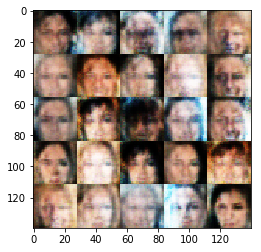

Epoch 1/1... Discriminator Loss: 1.2287... Generator Loss: 0.6158
Epoch 1/1... Discriminator Loss: 1.1118... Generator Loss: 0.7860
Epoch 1/1... Discriminator Loss: 1.2967... Generator Loss: 0.4900
Epoch 1/1... Discriminator Loss: 1.5257... Generator Loss: 0.3164
Epoch 1/1... Discriminator Loss: 1.9654... Generator Loss: 0.1979
Epoch 1/1... Discriminator Loss: 1.3493... Generator Loss: 1.3168
Epoch 1/1... Discriminator Loss: 1.0968... Generator Loss: 0.9563
Epoch 1/1... Discriminator Loss: 0.8297... Generator Loss: 2.0544
Epoch 1/1... Discriminator Loss: 1.6601... Generator Loss: 0.2735
Epoch 1/1... Discriminator Loss: 1.1403... Generator Loss: 1.0921


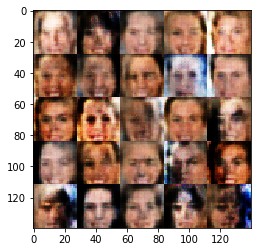

Epoch 1/1... Discriminator Loss: 1.1615... Generator Loss: 0.7467
Epoch 1/1... Discriminator Loss: 1.2464... Generator Loss: 0.4655
Epoch 1/1... Discriminator Loss: 1.0146... Generator Loss: 0.8235
Epoch 1/1... Discriminator Loss: 1.3246... Generator Loss: 1.0915
Epoch 1/1... Discriminator Loss: 1.3778... Generator Loss: 0.5086
Epoch 1/1... Discriminator Loss: 1.0693... Generator Loss: 1.1522
Epoch 1/1... Discriminator Loss: 1.4159... Generator Loss: 0.5334
Epoch 1/1... Discriminator Loss: 1.4573... Generator Loss: 0.3610
Epoch 1/1... Discriminator Loss: 1.7483... Generator Loss: 0.2559
Epoch 1/1... Discriminator Loss: 1.8272... Generator Loss: 3.3256


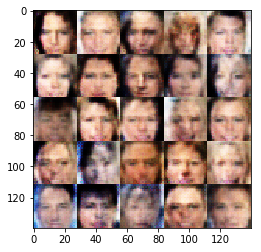

Epoch 1/1... Discriminator Loss: 1.3012... Generator Loss: 0.7025
Epoch 1/1... Discriminator Loss: 1.5622... Generator Loss: 1.7661
Epoch 1/1... Discriminator Loss: 1.2911... Generator Loss: 1.0675


KeyboardInterrupt: 

In [14]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.